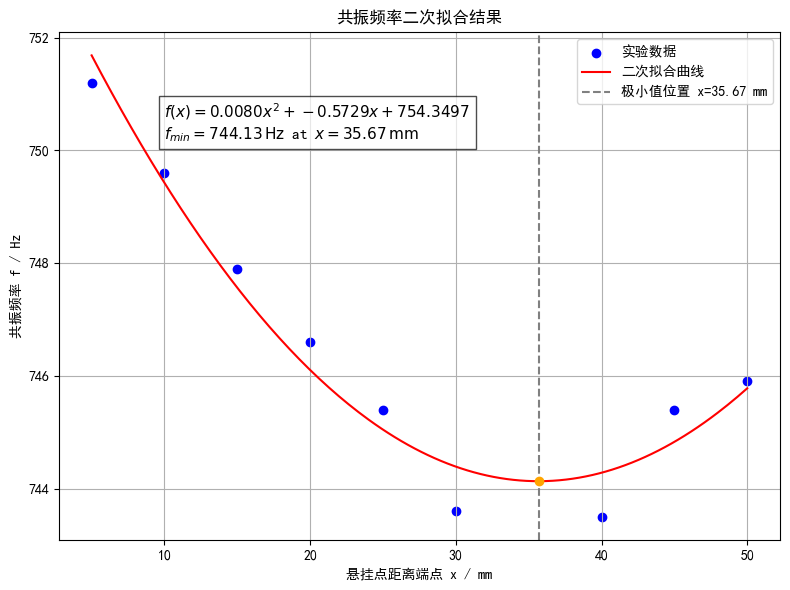

拟合系数: a=0.008030, b=-0.572907, c=754.349718
极小值位置 x_min = 35.674 mm
极小值对应频率 f_min = 744.131 Hz
频率标准差 σ_f = 0.539 Hz
频率不确定度 (3σ) = 1.618 Hz


In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'FangSong']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题

# 实验数据
x = np.array([5, 10, 15, 20, 25, 30, 40, 45, 50])  # mm（去掉缺失点）
f = np.array([751.2, 749.6, 747.9, 746.6, 745.4, 743.6, 743.5, 745.4, 745.9])  # Hz

# 二次拟合 f = a*x^2 + b*x + c
coeffs = np.polyfit(x, f, 2)
a, b, c = coeffs
fit_func = np.poly1d(coeffs)

# 拟合曲线数据
x_fit = np.linspace(min(x), max(x), 200)
f_fit = fit_func(x_fit)

# 极小值点（顶点）
x_min = -b / (2 * a)
f_min = fit_func(x_min)

# 残差标准差（频率标准差）
residuals = f - fit_func(x)
sigma_f = np.std(residuals, ddof=1)
uncertainty = 3 * sigma_f

# 绘图
plt.figure(figsize=(8, 6))
plt.scatter(x, f, color='blue', label='实验数据')
plt.plot(x_fit, f_fit, color='red', label='二次拟合曲线')
plt.axvline(x_min, color='gray', linestyle='--', label=f'极小值位置 x={x_min:.2f} mm')
plt.scatter(x_min, f_min, color='orange', zorder=5)

# 图注（拟合方程）
eq_text = f"$f(x) = {a:.4f}x^2 + {b:.4f}x + {c:.4f}$\n" \
          f"$f_{{min}} = {f_min:.2f}\\,\\mathrm{{Hz}}$ at $x = {x_min:.2f}\\,\\mathrm{{mm}}$"
plt.text(10, max(f)-1, eq_text, fontsize=11, bbox=dict(facecolor='white', alpha=0.7))

plt.xlabel('悬挂点距离端点 x / mm')
plt.ylabel('共振频率 f / Hz')
plt.title('共振频率二次拟合结果')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 输出数值结果
print(f"拟合系数: a={a:.6f}, b={b:.6f}, c={c:.6f}")
print(f"极小值位置 x_min = {x_min:.3f} mm")
print(f"极小值对应频率 f_min = {f_min:.3f} Hz")
print(f"频率标准差 σ_f = {sigma_f:.3f} Hz")
print(f"频率不确定度 (3σ) = {uncertainty:.3f} Hz")
